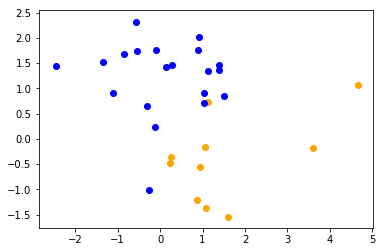

In [4]:
import numpy as np
import matplotlib.pyplot as plt

mean_a = np.array([1.5, 0])

cov = np.eye(2)

a = np.random.multivariate_normal(mean_a,cov,10)

plt.scatter(a[:,0],a[:,1], c='orange')


b = np.random.multivariate_normal(mean_a[::-1],cov,20)

plt.scatter(b[:,0],b[:,1],c='blue')

plt.show()

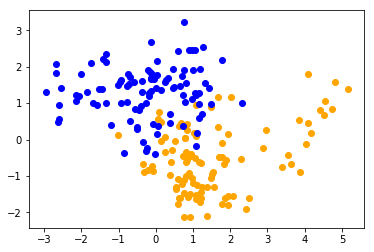

In [5]:
indices = np.random.randint(0,10,200)
noise = np.random.multivariate_normal(np.zeros(2),0.25*cov,200)
x = np.append(a[indices[:100]], b[indices[100:]], 0) + noise 
y = np.append(np.zeros(100), np.ones(100))

plt.scatter(x[:100,0], x[:100,1],c='orange')

plt.scatter(x[100:,0], x[100:,1],c='blue')


In [6]:
import numpy.linalg as LA
def lls(x,y):
    X_hat = np.hstack((np.ones((x.shape[0],1)), x))
    b = np.dot(X_hat.T, y)
    q, r = LA.qr(np.dot(X_hat.T, X_hat))
    p = np.dot(q.T, b)
    alpha = np.dot(LA.inv(r), p)
    return alpha


In [7]:
#applies linear map alpha to x
#Values x have to be passed as n times 2 array
def apply(alpha,x):
    x_hat = np.hstack((np.ones((x.shape[0],1)), x))
    return np.dot(x_hat, alpha)

def PlotContourLine(func, value=0, minx=0, maxx=10, miny=0, maxy=10):
    #This plots the contourline func(x) = value
    
    samplenum = 1000
    xrange = np.arange(minx, maxx, (maxx-minx)/samplenum)
    yrange = np.arange(miny, maxy, (maxy-miny)/samplenum)
    
    #This generates a two-dimensional mesh
    X, Y = np.meshgrid(xrange,yrange)
    
    argsForf = np.array([X.flatten(),Y.flatten()]).T
    Z = func(argsForf)
    Z = np.reshape(Z,X.shape)
    
    plt.xlim(minx, maxx)
    plt.ylim(miny, maxy)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    #plt.contour(X, Y, Z, alpha=0.5,levels=[value],linestyles='dashed',linewidths=3)
    Z = np.where(Z > value, 1, -1)
    plt.contourf(X, Y, Z, alpha=0.2, colors=('red', 'blue'))

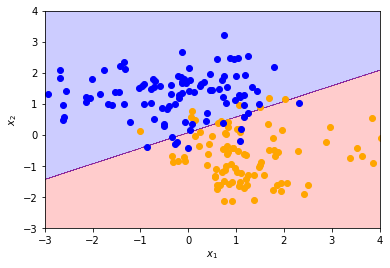

In [8]:
alpha = lls(x,y)
f = lambda x: apply(alpha,x)

PlotContourLine(f, 0.5, -3.0, 4.0, -3.0, 4.0)

plt.scatter(x[:100,0], x[:100,1],c='orange')

plt.scatter(x[100:,0], x[100:,1],c='blue')

In [82]:
#the vector y is the ground truth for the test points x. 
#In particular we need the length of y to be the same as the length of x.
def compute_confusion_matrix(f, x, y, n):
    c = np.empty((n,n))
    y_predicted = np.rint(np.clip(f(x),0,1).astype(np.float))
    for i in range(0, n):
        for j in range(0, n):
            c[i,j] = np.sum(np.logical_and(y_predicted == i, y == j))
    return c

c = compute_confusion_matrix(f,x,y,2)
print("The confusion matrix for our training data is:\n" ,c)
print("The accuracy of the model is: ",  np.trace(c)/x.shape[0])



The confusion matrix for our training data is:
 [[99. 54.]
 [ 1. 46.]]
The accuracy of the model is:  0.725


In [10]:
indices = np.random.randint(0,10,20000)
noise = np.random.multivariate_normal(np.zeros(2),0.25*cov,20000)

x_test = np.append(a[indices[:10000]], b[indices[10000:]], 0) + noise 
y_test = np.append(np.zeros(10000), np.ones(10000))

c_test = compute_confusion_matrix(x_test, y_test, 2)
print("The confusion matrix for our test data is:\n" ,c_test)
print("The accuracy of the model is: ",  np.trace(c_test)/x_test.shape[0])

The confusion matrix for our test data is:
 [[9063.  661.]
 [ 937. 9339.]]
The accuracy of the model is:  0.9201


The accuracy of the model decreased on the test set as expected, since
by construction the seperating hyperplane minimizes the error only on the training set.
One could say that our model is overfitting.

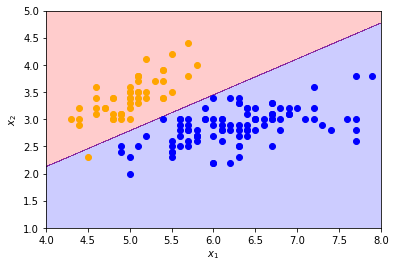

In [11]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
irisDataFrame = pd.read_csv(url, header=None)

x = irisDataFrame.values[:,:2]
y = irisDataFrame.values[:,4] != 'Iris-setosa'

alpha = lls(x,y)
f = lambda x: apply(alpha,x)

num_setosa = np.where(y==1)[0][0]

PlotContourLine(f,0.5,4,8,1,5)
plt.scatter(x[:num_setosa,0], x[:num_setosa,1],c='orange')
plt.scatter(x[num_setosa:,0], x[num_setosa:,1],c='blue')



In [12]:
x = irisDataFrame.values[:,:4]
alpha = lls(x,y)
f = lambda x: apply(alpha,x)

c = compute_confusion_matrix(x, y, 2)
print("The confusion matrix for our test data is:\n" ,c)
print("The accuracy of the model is: ",  np.trace(c)/x.shape[0])


The confusion matrix for our test data is:
 [[ 50.   0.]
 [  0. 100.]]
The accuracy of the model is:  1.0


The confusion matrix for our test data is:
 [[24. 14.]
 [26. 86.]]
The accuracy of the model is:  0.7333333333333333


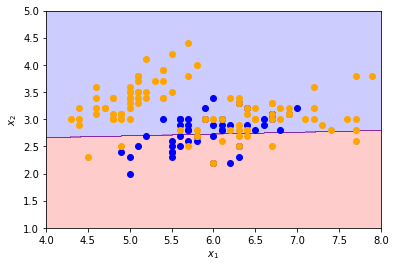

In [13]:
x = irisDataFrame.values[:,:2]
y = irisDataFrame.values[:,4] != 'Iris-versicolor'

alpha = lls(x,y)
f = lambda x: apply(alpha,x)

PlotContourLine(f,0.5,4,8,1,5)
plt.scatter(x[:50,0], x[:50,1],c='orange')
plt.scatter(x[50:100,0], x[50:100,1],c='blue')
plt.scatter(x[100:150,0], x[100:150,1],c='orange')

x = irisDataFrame.values[:,:4]
alpha = lls(x,y)
f = lambda x: apply(alpha,x)

c = compute_confusion_matrix(x, y,2)
print("The confusion matrix for our test data is:\n" ,c)
print("The accuracy of the model is: ",  np.trace(c)/x.shape[0])



The data is not linearly separable anymore.

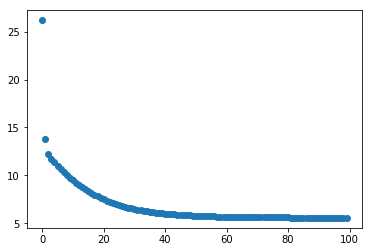

In [41]:
import numpy.linalg as LA 


def grad_decent(x,y, alpha):
    errors = np.zeros(100)
#    alpha = np.random.randn(x.shape[1]+1)
    x_hat = np.hstack((np.ones((x.shape[0],1)), x))
    for i in range(0,100):
        y_old = np.dot(x_hat, alpha)
        alpha = alpha - nu * 2.0/150 * np.dot(x_hat.T, y_old-y)
        y_new = np.dot(x_hat, alpha)
        errors[i] = LA.norm(y_new-y)
        #if the error termin converges, exit the look
#         if LA.norm(y_new-y_old) < 1e-3:
#             print("The error term converged to {} after {} steps".format(errors[-1],i))
#             break
    return (alpha, errors)

x = irisDataFrame.values[:,:4]
y = irisDataFrame.values[:,4] != 'Iris-versicolor'

nu = 1e-2
alpha = np.random.randn(x.shape[1]+1)
(alpha, errors) = grad_decent(x,y,alpha)

plt.scatter(range(0,len(errors)),errors)



The learning rate is very important. It needs to be carfeully set, otherwise gradient decent will not converge to a global minimum.
There seem to be more local minima if we try to classify setosa vs rest.


In [42]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

[5.843333333333335 3.0540000000000007 3.7586666666666693
 1.1986666666666672]
[0.82530129 0.43214658 1.75852918 0.76061262]
[[-0.9006811702978099 1.0320572244889554 -1.3412724047598334
  -1.3129767272601458]
 [-1.1430169111851116 -0.12495760117131036 -1.3412724047598334
  -1.3129767272601458]
 [-1.3853526520724144 0.3378483290927964 -1.3981381087490858
  -1.3129767272601458]
 [-1.5065205225160663 0.106445363960743 -1.284406700770581
  -1.3129767272601458]
 [-1.0218490407414607 1.2634601896210087 -1.3412724047598334
  -1.3129767272601458]
 [-0.5371775589668552 1.9576690850171679 -1.1706752927920763
  -1.0500307872213983]
 [-1.5065205225160663 0.800654259356902 -1.3412724047598334
  -1.181503757240772]
 [-1.0218490407414607 0.800654259356902 -1.284406700770581
  -1.3129767272601458]
 [-1.748856263403368 -0.3563605663033637 -1.3412724047598334
  -1.3129767272601458]
 [-1.1430169111851116 0.106445363960743 -1.284406700770581
  -1.4444496972795193]
 [-0.5371775589668552 1.4948631547530622 -

The average error after 100 iterations for the unnormalized data is  5.224951179490324
The average error after 100 iterations for the normalized data is  5.322761243675022


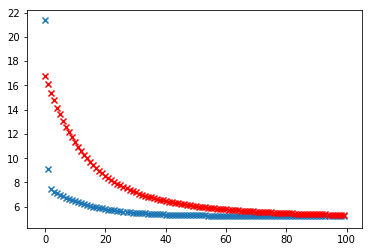

In [46]:

    
mean = np.sum(x,0)/x.shape[0]
print(mean)
std = LA.norm((x-mean).astype(np.double),axis=0)/np.sqrt(x.shape[0])
print(std)
x_n = (x-mean)/std
print(x_n)

errors_unnormalized = np.zeros(100)
errors_normalized = np.zeros(100)
for i in range(0,100):
    alpha = np.random.rand(x.shape[1]+1)
    (_, errors) = grad_decent(x,y,alpha)
    errors_unnormalized = errors_unnormalized + errors
    (_, errors) = grad_decent(x_n,y,alpha)
    errors_normalized = errors_normalized + errors
    

errors_unnormalized = errors_unnormalized / 100
errors_normalized = errors_normalized / 100

plt.scatter(range(0,100),errors_unnormalized, marker='x')
plt.scatter(range(0,100),errors_normalized, c='red', marker='x')

print("The average error after 100 iterations for the unnormalized data is ", errors_unnormalized[-1])
print("The average error after 100 iterations for the normalized data is ", errors_normalized[-1])


For better comparability we run gradient decent a 100 times for each the normalized training set and the unnormalized training set. I then average the errors to obtain the above plot. I can't tell any advantage in this case.

In [ ]:
# Alexandros test

mean_a = np.array([1.5, 0])
cov = np.eye(2)
a = np.random.multivariate_normal(mean_a,cov,10)
b = np.random.multivariate_normal(mean_a[::-1],cov,20)

indices = np.random.randint(0,10,200)
noise = np.random.multivariate_normal(np.zeros(2),0.25*cov,200)
x = np.append(a[indices[:100]], b[indices[100:]], 0) + noise 
y = np.append(np.zeros(100), np.ones(100))

plt.scatter(x[:100,0], x[:100,1],c='orange')
plt.scatter(x[100:,0], x[100:,1],c='blue')



In [ ]:
import scipy.spatial.distance as dist

d=dist.cdist(x,x,'euclidean')


The confusion matrix for our test data is:
 [[100.   0.]
 [  0. 100.]]
The accuracy of the model is:  100.0


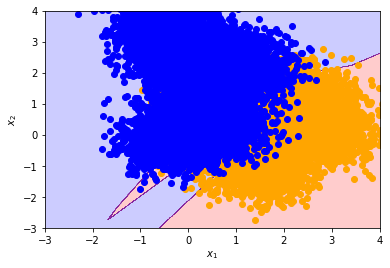

In [80]:
from scipy.spatial import distance

a = np.random.multivariate_normal(mean_a,cov,10)
b = np.random.multivariate_normal(mean_a[::-1],cov,20)
indices = np.random.randint(0,10,200)
noise = np.random.multivariate_normal(np.zeros(2),0.25*cov,200)
x = np.append(a[indices[:100]], b[indices[100:]], 0) + noise 
y = np.append(np.zeros(100), np.ones(100))
indices = np.random.randint(0,10,20000)
noise = np.random.multivariate_normal(np.zeros(2),0.25*cov,20000)
x_test = np.append(a[indices[:10000]], b[indices[10000:]], 0) + noise 
y_test = np.append(np.zeros(10000), np.ones(10000))

def k_nearest_neighbors(points,k):
    return np.sum(y[np.argsort(distance.cdist(points,x))[:,:k]],1)/k

f = lambda x: k_nearest_neighbors(x, 1)
c = compute_confusion_matrix(x, y, 2)
print("The confusion matrix for our test data is:\n" ,c)
print("The accuracy of the model is: ",  np.trace(c)/c.shape[0])


PlotContourLine(f, 0.5, -3.0, 4.0, -3.0, 4.0)

plt.scatter(x_test[:10000,0], x_test[:10000,1],c='orange')

plt.scatter(x_test[10000:,0], x_test[10000:,1],c='blue')


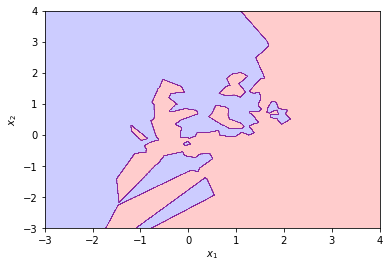

The confusion matrix for our test data is:
 [[ 93.   0.]
 [  7. 100.]]
The accuracy of the model is:  96.5
The confusion matrix for our test data is:
 [[75.  1.]
 [25. 99.]]
The accuracy of the model is:  87.0


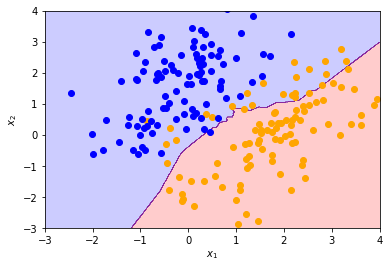

In [79]:
f = lambda x: k_nearest_neighbors(x, 15)
c = compute_confusion_matrix(x, y, 2)
print("The confusion matrix for our test data is:\n" ,c)
print("The accuracy of the model is: ",  np.trace(c)/c.shape[0])

f = lambda x: k_nearest_neighbors(x, 185)
c = compute_confusion_matrix(x, y, 2)
print("The confusion matrix for our test data is:\n" ,c)
print("The accuracy of the model is: ",  np.trace(c)/c.shape[0])

PlotContourLine(f, 0.5, -3.0, 4.0, -3.0, 4.0)

plt.scatter(x[:100,0], x[:100,1],c='orange')

plt.scatter(x[100:,0], x[100:,1],c='blue')

In [84]:
errors = np.zeros(199)
errors_test = np.zeros(199)

for i in range(1,200):
    f = lambda x: k_nearest_neighbors(x, i)
    c = compute_confusion_matrix(f, x_test, y_test, 2)
    errors[i-1] = np.trace(c)/2.0
    
    c = compute_confusion_matrix(f, x_test, y_test, 2)
    errors_test[i-1] = np.trace(c)/200.0
    
plt.scatter(range(1,200),errors, marker='x')
plt.scatter(range(1,200),errors_test, c='red', marker='x')


TypeError: compute_confusion_matrix() missing 1 required positional argument: 'n'